In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
filename = r'/content/drive/MyDrive/Mall_Customers.csv'
import csv
open(filename)
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [8]:
df=df.drop(['CustomerID'],axis=1)

In [9]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<Axes: >

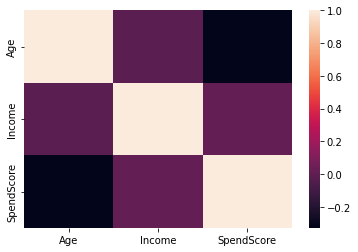

In [10]:
sns.heatmap(df.corr())

In [21]:
x=df.iloc[:,[1,3]].values

In [19]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [22]:
model=db.fit(x)

In [14]:
label=model.labels_

In [15]:
label

array([-1,  0, -1,  0,  1,  0, -1, -1, -1,  2, -1, -1, 16,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, 13, -1,  4, -1, -1, -1, -1, -1, -1,
       14,  0,  3,  2, -1,  0, -1, -1, -1,  4, -1, -1, 10, -1,  1,  1, -1,
        4, -1, -1,  5,  5,  5,  7, -1,  5, -1,  6,  7, -1,  7, -1, -1,  7,
        6, -1, -1,  5, -1, -1, -1,  8, -1, -1, -1,  5, -1, -1, -1,  5,  6,
        5, -1,  6,  4,  5, -1, -1,  5,  9,  1,  8,  5, -1,  5, 11, -1,  5,
       -1,  8, 10, -1,  7, -1, -1,  7,  7,  6,  9, 11, 11, 11, -1, 10,  5,
       10,  8,  9, -1, -1, -1, -1, -1, -1, 16, 12, -1, 12, -1,  2, -1, 13,
       -1,  2, -1, -1, -1, -1,  1, 13, -1, -1, -1,  2, -1, 15,  3, -1, -1,
       12, 14, 13, -1, -1, -1,  2, -1, 13, -1, -1, -1, 12,  3, -1, -1, -1,
       -1,  2, -1, 15, -1, 13, 16, -1, 16, 15, -1, 13, 14, 13,  9, -1, -1,
       -1,  3, -1, -1,  2, -1, 15, 14, -1, -1,  2, -1, 13])

In [16]:
from sklearn import metrics

#Calculer le nombre de cluster

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No de clusters:',n_clusters)

No de clusters: 17


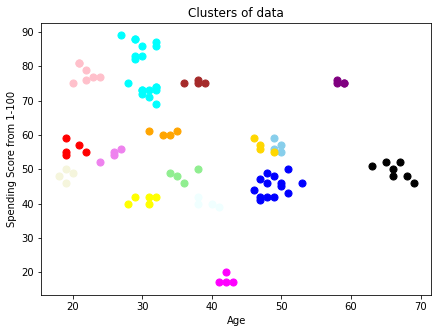

In [17]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.scatter(x[y_means == 9, 0], x[y_means == 9, 1], s = 50, c = 'azure')
plt.scatter(x[y_means == 10, 0], x[y_means == 10, 1], s = 50, c = 'skyblue')
plt.scatter(x[y_means == 11, 0], x[y_means == 11, 1], s = 50, c = 'beige')
plt.scatter(x[y_means == 12, 0], x[y_means == 12, 1], s = 50, c = 'brown')
plt.scatter(x[y_means == 13, 0], x[y_means == 13, 1], s = 50, c = 'aqua')
plt.scatter(x[y_means == 14, 0], x[y_means == 10, 1], s = 50, c = 'gold')
plt.scatter(x[y_means == 15, 0], x[y_means == 11, 1], s = 50, c = 'lightgreen')
plt.scatter(x[y_means == 16, 0], x[y_means == 12, 1], s = 50, c = 'purple')
plt.xlabel('Age')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()